<a href="https://colab.research.google.com/github/tony9321/Record-of-machine-learning-journey/blob/main/fcc_bike_regression_Tony(supervised_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
# seaborn is for plotting certain things
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

#Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

In [8]:
dataset_cols=["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df=pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

In [9]:
df.head()

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [10]:
df.columns=dataset_cols
df["functional"]=(df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]
df=df.drop(["hour"], axis=1)

In [11]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


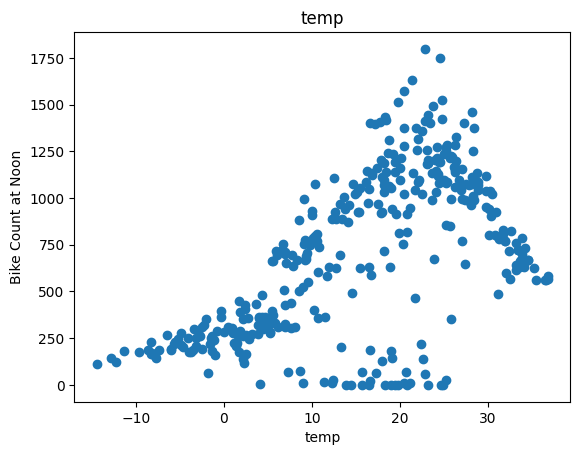

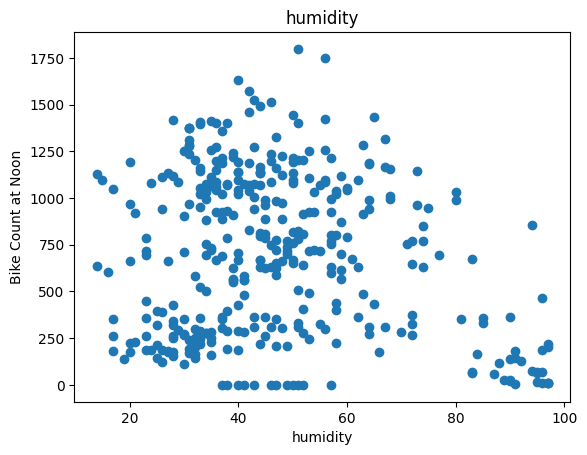

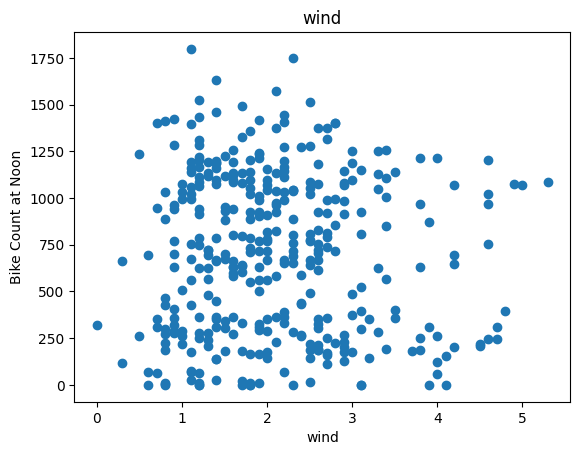

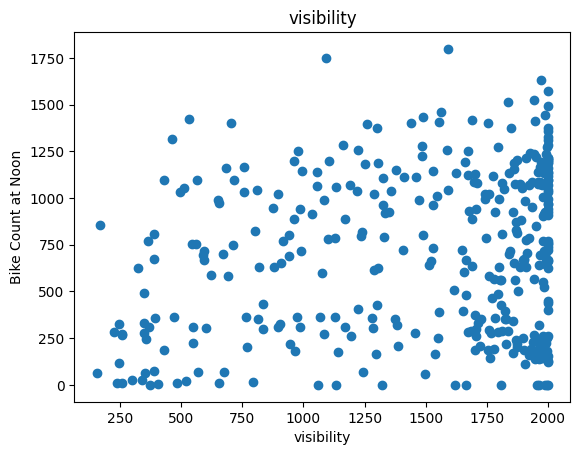

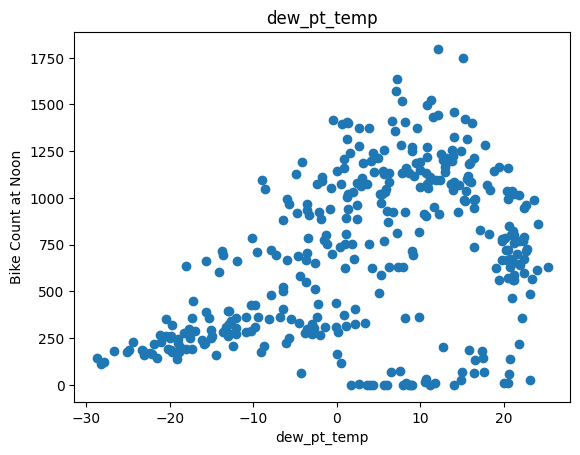

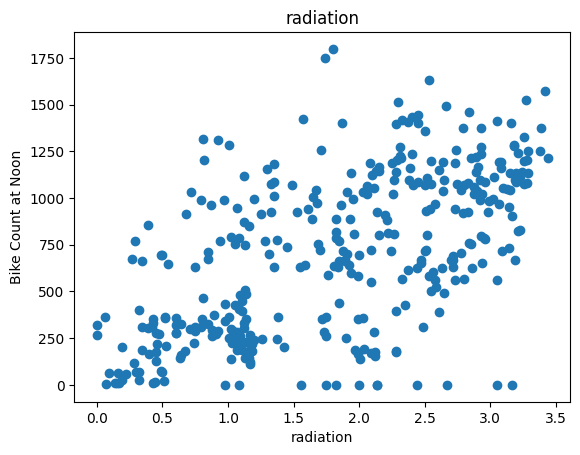

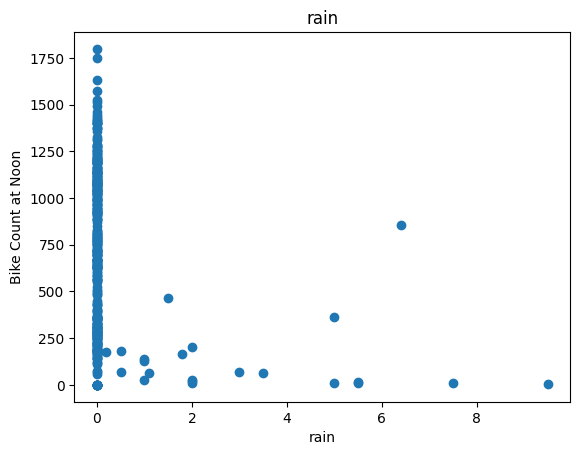

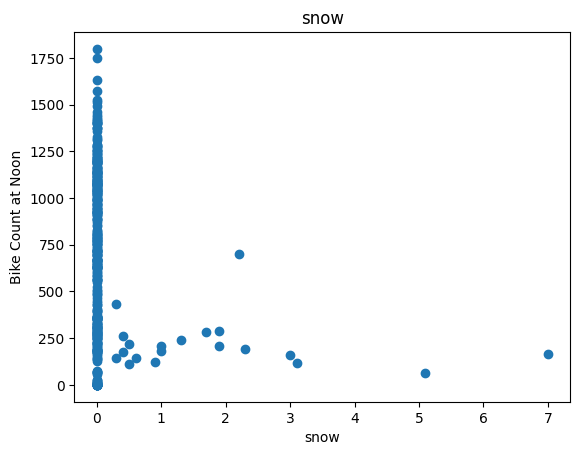

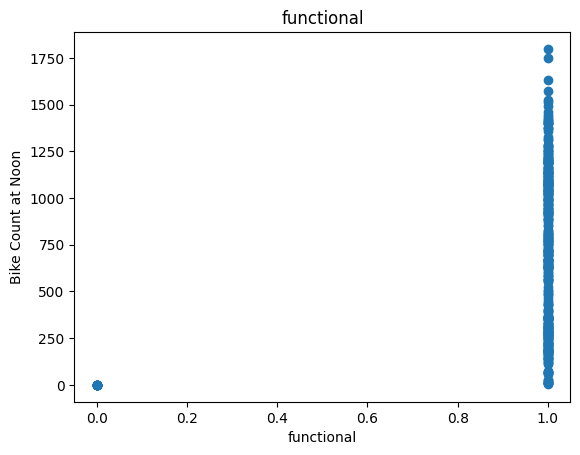

In [12]:
# start after the dirst column
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [13]:
df=df.drop(["wind", "visibility", "functional"], axis=1)

In [14]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


#Train/Validation/Test Dataset

In [15]:
train, val, test=np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [16]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe=copy.deepcopy(dataframe)
  if x_labels is None:
  #copy everything
    X=dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X=dataframe[x_labels[0]].values.reshape(-1, 1) #make it 2D
    else:
      X=dataframe[x_labels].values

  y=dataframe[y_label].values.reshape(-1, 1)
  data=np.hstack((X, y))

  return data, X, y

In [17]:
_, X_train_temp, y_train_temp=get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp=get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp=get_xy(test, "bike_count", x_labels=["temp"])

In [18]:
#regressor
temp_reg=LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [19]:
#coefficient and y-intercept
print(temp_reg.coef_, temp_reg.intercept_)

[[21.45764945]] [389.1653749]


In [20]:
# R^2
temp_reg.score(X_test_temp, y_test_temp)

0.19654470171036398

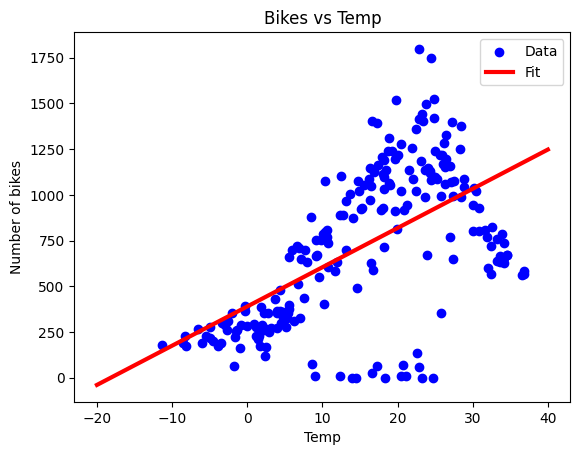

In [21]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color="blue")
#data from x will be from -20 to 40 and we will take 100 things from there
x=tf.linspace(-20, 40, 100)
#reshape to 2D array oterwise would cause error
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

#Multiple Linear Regression

In [22]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
#[1:] means use every columns except of the first one which is bike_count here
_, X_train_all, y_train_all=get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all=get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all=get_xy(test, "bike_count", x_labels=df.columns[1:])

In [23]:
all_reg=LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [24]:
# the result of the R^2 did improve compared to the one above
all_reg.score(X_test_all, y_test_all)

0.3720240713200147

In [25]:
y_pred_lr=all_reg.predict(X_test_all)

#Regression with Neural Network

In [26]:
#epoch means training cycle, we are plotting the accuracy over the epochs
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [27]:
# input_shape is one because we only use temparature
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
# reshape to single layer
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [28]:
#model(we use back propagation)
temp_nn_model=tf.keras.Sequential([
    temp_normalizer,
    #add only one dense layer means only one unit -> output is also linear if there is no activation function
    tf.keras.layers.Dense(1)
])

In [29]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [30]:
history=temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

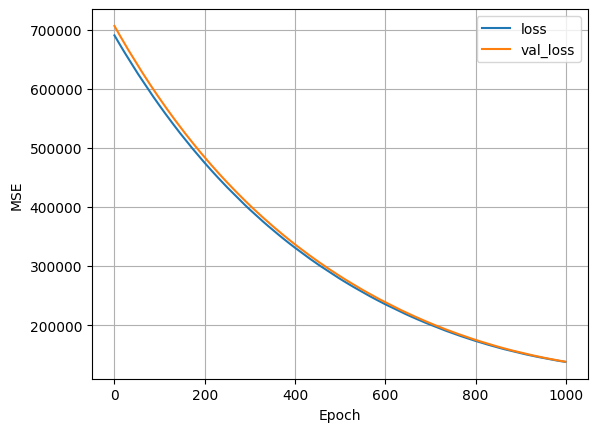

In [31]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


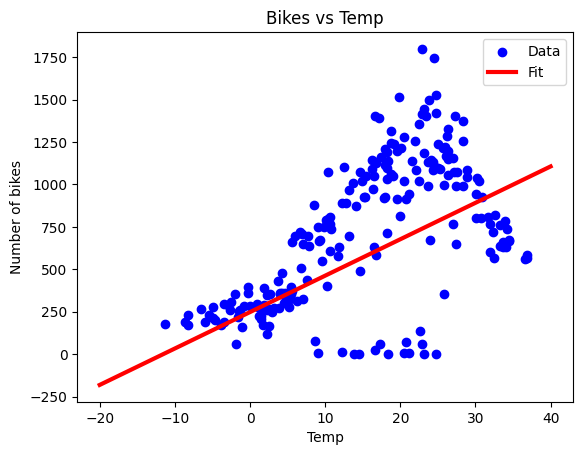

In [32]:
# this is copied from above with modifications
plt.scatter(X_train_temp, y_train_temp, label='Data', color="blue")
#data from x will be from -20 to 40 and we will take 100 things from there
x=tf.linspace(-20, 40, 100)
#reshape to 2D array oterwise would cause error
#use neural network(temp_nn_model) here instead of temprature regression
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

#the linear regression may look different from the one above because they are two different ways to find it(different training process)

#Neural Net(real net instead of just one unit)

In [33]:
#model(we use back propagation)

# input_shape is one because we only use temparature
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
# reshape to single layer

temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model=tf.keras.Sequential([
    temp_normalizer,
    #32units to form the net
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # only one output(one answer)
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [34]:
history=nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

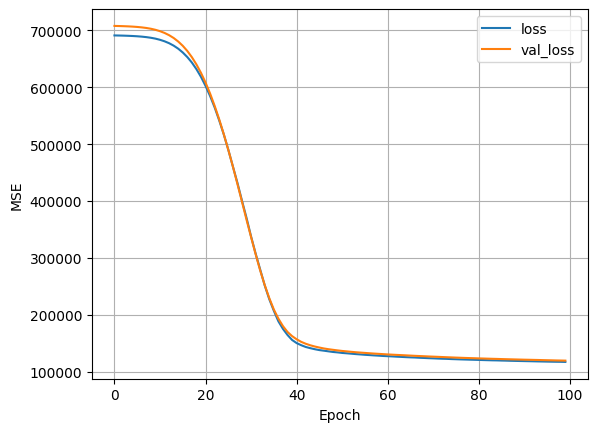

In [35]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


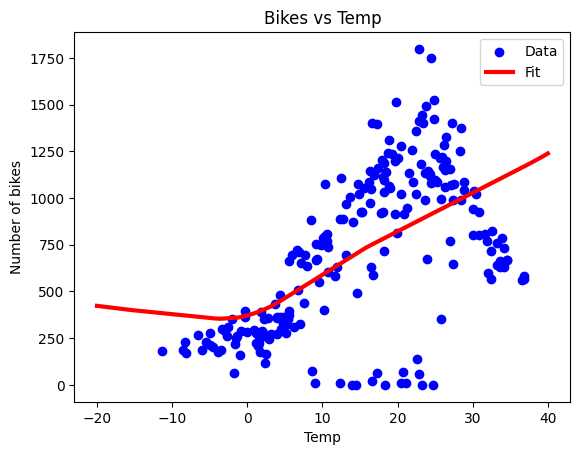

In [36]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color="blue")
#data from x will be from -20 to 40 and we will take 100 things from there
x=tf.linspace(-20, 40, 100)
#reshape to 2D array oterwise would cause error
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [37]:
#multiple inputs model(we use back propagation)

# input_shape is one because we only use temparature
all_normalizer=tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
# reshape to single layer

all_normalizer.adapt(X_train_all)

In [46]:
nn_model=tf.keras.Sequential([
    all_normalizer,
    #32units to form the net
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # only one output(one answer)
    tf.keras.layers.Dense(1),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [47]:
history=nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

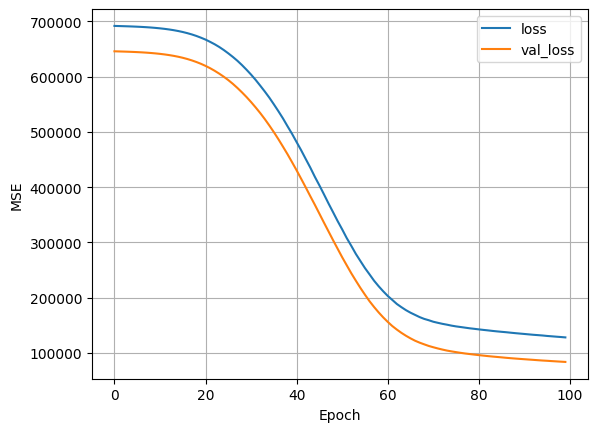

In [48]:
plot_loss(history)

In [41]:
#calculate Mean Square Error(MSE) for both linear reg and neural network(nn)
y_pred_lr=all_reg.predict(X_test_all)
y_pred_nn=nn_model.predict(X_test_all)

3/3 [==============================] - 0s 3ms/step


In [42]:
def MSE(y_pred, y_real):
  return (np.square(y_pred-y_real)).mean()

In [43]:
MSE(y_pred_lr, y_test_all)

116393.85593812879

In [44]:
MSE(y_pred_nn, y_test_all)

120222.16316523094

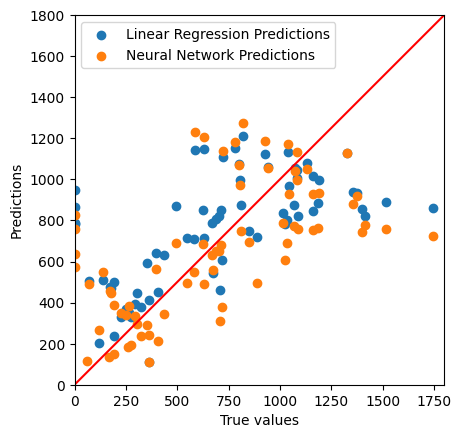

In [49]:
ax=plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Linear Regression Predictions")
plt.scatter(y_test_all, y_pred_nn, label="Neural Network Predictions")
plt.xlabel("True values")
plt.ylabel("Predictions")
limit=[0, 1800]
plt.xlim(limit)
plt.ylim(limit)
plt.legend()
_=plt.plot(limit, limit, c="red")